# Approximations worksheet

PHYS475 - Advanced Quantum Mechanics

(c) 2025, Theodore Corcovilos

The purpose of this file is to give you a starting point to investigate the questions posed in "Writing Assignment 1".  You'll get the most out of this by exerimenting with the code: change some of the variables, try different potentials, explore!

## Truncated Basis approximation
Solving the Hamiltonian

$$ \hat{H} = \frac12 \hat{p}^2 + \frac12 \hat{x}^2 + \frac12 \alpha^2 \hat{x}^2 $$

using the **truncated basis approximation**, using the harmonic oscillator energy basis.

The size of the basis is set by changing the variable `nmax` below.

The value of $ \alpha $ is set by changing the variable `alpha` below.

In [1]:
# import some needed libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
%matplotlib inline

In [10]:
np.get_printoptions()

{'edgeitems': 3,
 'threshold': 1000,
 'floatmode': 'maxprec',
 'precision': 5,
 'suppress': False,
 'linewidth': 75,
 'nanstr': 'nan',
 'infstr': 'inf',
 'sign': '-',
 'formatter': None,
 'legacy': False,
 'override_repr': None}

In [11]:
# set some display options
np.set_printoptions(precision=5,linewidth=80)

In [12]:
nmax = 8 # max energy level to include (counting starts at zero)

In [13]:
alpha = 0.3 # perturbation parameter value

In [14]:
# The exact eigenvalues for later comparison...
def exact_energy(n,alpha):
    '''
    The exact eigenenergy for the n-th state and perturbation parameter alpha
    '''
    return np.sqrt(1+alpha**2)*(n+0.5) # exact energies, calculated earlier by solving H by hand.
exactEn = exact_energy(np.array(range(nmax+1)),alpha) # list of the first nmax energies 

In [15]:
print(exactEn)

[0.52202 1.56605 2.61008 3.65411 4.69814 5.74217 6.7862  7.83023 8.87426]


Below, the lowering operator $ \hat{a} $ is defined in matrix form.  The code is a shortcut to generate the matrix elements

$$ a_{mn} = \langle m | \hat{a} | n \rangle  = \sqrt{n}\, \langle m | n-1 \rangle = \sqrt{n}\, \delta_{m,n-1}. $$

In [16]:
a = np.matrix(np.diag(np.sqrt(np.array(range(nmax))+1.),k=1)) # lowering operator in matrix form

In [17]:
print(a) # show the matrix form of a

[[0.      1.      0.      0.      0.      0.      0.      0.      0.     ]
 [0.      0.      1.41421 0.      0.      0.      0.      0.      0.     ]
 [0.      0.      0.      1.73205 0.      0.      0.      0.      0.     ]
 [0.      0.      0.      0.      2.      0.      0.      0.      0.     ]
 [0.      0.      0.      0.      0.      2.23607 0.      0.      0.     ]
 [0.      0.      0.      0.      0.      0.      2.44949 0.      0.     ]
 [0.      0.      0.      0.      0.      0.      0.      2.64575 0.     ]
 [0.      0.      0.      0.      0.      0.      0.      0.      2.82843]
 [0.      0.      0.      0.      0.      0.      0.      0.      0.     ]]


In [18]:
print(a.H) # the .H method of a numpy matrix is the Hermitian conjugate, what we call "dagger".

[[0.      0.      0.      0.      0.      0.      0.      0.      0.     ]
 [1.      0.      0.      0.      0.      0.      0.      0.      0.     ]
 [0.      1.41421 0.      0.      0.      0.      0.      0.      0.     ]
 [0.      0.      1.73205 0.      0.      0.      0.      0.      0.     ]
 [0.      0.      0.      2.      0.      0.      0.      0.      0.     ]
 [0.      0.      0.      0.      2.23607 0.      0.      0.      0.     ]
 [0.      0.      0.      0.      0.      2.44949 0.      0.      0.     ]
 [0.      0.      0.      0.      0.      0.      2.64575 0.      0.     ]
 [0.      0.      0.      0.      0.      0.      0.      2.82843 0.     ]]


In [19]:
a*a.H-a.H*a # just checking if the commutator rule works: [a,a.H]=1
#Should yield the identity matrix.  (Last row/column will be wrong because we are approximating.)

matrix([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -8.]])

In [20]:
x = (a + a.H)/np.sqrt(2.) # define the position operator x

In [21]:
print(x)

[[0.      0.70711 0.      0.      0.      0.      0.      0.      0.     ]
 [0.70711 0.      1.      0.      0.      0.      0.      0.      0.     ]
 [0.      1.      0.      1.22474 0.      0.      0.      0.      0.     ]
 [0.      0.      1.22474 0.      1.41421 0.      0.      0.      0.     ]
 [0.      0.      0.      1.41421 0.      1.58114 0.      0.      0.     ]
 [0.      0.      0.      0.      1.58114 0.      1.73205 0.      0.     ]
 [0.      0.      0.      0.      0.      1.73205 0.      1.87083 0.     ]
 [0.      0.      0.      0.      0.      0.      1.87083 0.      2.     ]
 [0.      0.      0.      0.      0.      0.      0.      2.      0.     ]]


In [22]:
p = -1.j/np.sqrt(2)*(a-a.H) # define the momentum operator p (j = sqrt(-1))

In [23]:
H0 = p**2/2 + x**2/2 # Unperturbed Hamiltonian ( ** means "power" in python).
# (Note * is matrix multiplication and ** is matrix power for x and p, which are np.matrix objects.)

In [24]:
Hprime = alpha**2/2*x**2 # perturbation to the Hamiltonian

In [25]:
H = np.real(H0 + Hprime) # full Hamiltonian (We know H is real, but python doesn't.)

In [26]:
print(H)

[[0.5225  0.      0.03182 0.      0.      0.      0.      0.      0.     ]
 [0.      1.5675  0.      0.05511 0.      0.      0.      0.      0.     ]
 [0.03182 0.      2.6125  0.      0.07794 0.      0.      0.      0.     ]
 [0.      0.05511 0.      3.6575  0.      0.10062 0.      0.      0.     ]
 [0.      0.      0.07794 0.      4.7025  0.      0.12324 0.      0.     ]
 [0.      0.      0.      0.10062 0.      5.7475  0.      0.14582 0.     ]
 [0.      0.      0.      0.      0.12324 0.      6.7925  0.      0.16837]
 [0.      0.      0.      0.      0.      0.14582 0.      7.8375  0.     ]
 [0.      0.      0.      0.      0.      0.      0.16837 0.      4.18   ]]


In [27]:
energies, states = np.linalg.eigh(H) # calculate eigenvalues and eigenvectors

In [28]:
print(energies)

[0.52202 1.56605 2.61008 3.65411 4.16908 4.69835 5.74221 6.81049 7.84764]


In [29]:
# calculate relative errors in the eigenvalues
errors = (energies-exactEn)/exactEn

In [30]:
# show an example eigenstate vector
print(states[:,1])

[[ 1.20676e-17]
 [-9.99652e-01]
 [ 4.44089e-16]
 [ 2.63732e-02]
 [ 2.20074e-16]
 [-6.35162e-04]
 [ 2.58617e-18]
 [ 1.47681e-05]
 [-3.47570e-16]]


In [31]:
print(errors)

[-2.60959e-13  6.07840e-13 -6.29249e-09  4.48263e-09 -1.12611e-01 -1.81782e-01
 -1.53840e-01 -1.30232e-01 -1.15686e-01]


In [32]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Energies')

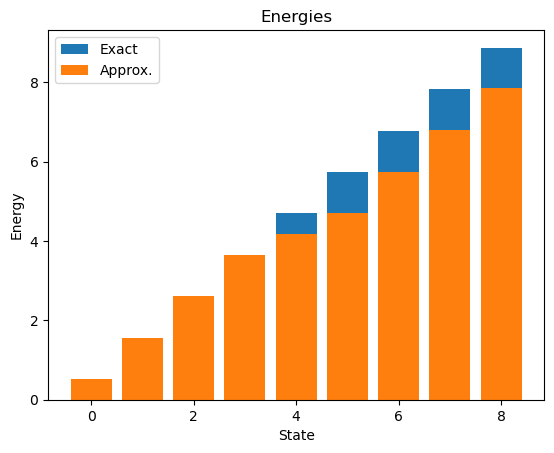

In [33]:
plt.bar(range(nmax+1),exactEn,label="Exact")
plt.bar(range(nmax+1),energies,label="Approx.")
plt.xlabel("State")
plt.ylabel("Energy")
plt.legend()
plt.title("Energies")

In [34]:
error_target = 0.001 # our comparison error level

Text(0.5, 1.0, 'Energy relative errors (Energy basis, nmax=8)')

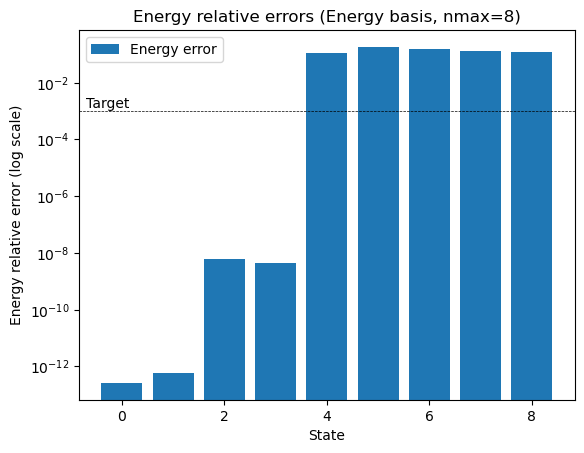

In [35]:
plt.bar(range(nmax+1),np.abs(errors),label="Energy error") # absolute value so we can use a log scale
plt.xlabel("State")
plt.ylabel("Energy relative error (log scale)")
plt.axhline(error_target,c='k',lw=0.5,ls="dashed")
plt.text(-0.7,error_target,"Target",fontsize="medium",verticalalignment="bottom")
plt.yscale("log")
plt.legend()
plt.title(f"Energy relative errors (Energy basis, nmax={nmax})")

Notice that the errors get larger with larger n, particularly for n > nmax/2

We'll define the error in the states by
$$ \text{State error}=  1-| \langle true | approx \rangle |^2 $$

In principle we could do this by calculating the intergral (numerically):
$$
\langle \text{true} \mid \text{approx} \rangle =
\int\limits_{-\infty}^{\infty} \psi_\text{true}^*(x)\, \psi_\text{approx}(x)\, dx
$$
where $\psi_\text{true}(x)$ is the SHO eigenstate wavefunction with new frequency $\omega' = \sqrt{\omega^2+\alpha^2}$, and $\psi_\text{approx}(x)$ is what we calculate above:

$$
\psi_\text{approx}(x) = \sum\limits_{n=0}^{\infty} c_n \psi^{(0)}_n(x),
$$
with the coefficients $c_n$ pulled from the eigenstate vectors above.

As an approximation, let's instead calculate the inner product of the approximate state with the *unperturbed* eigenstate.  This is quick and easy, but may not tell the full story.

In [36]:
# the "unperturbed" states would be the unit vectors, so we can just pull the diagonal elements from the coefficient matrix
stateErrors = 1.-np.abs(np.diag(states))**2 

Text(0.5, 1.0, 'State errors (Energy basis, nmax=8)')

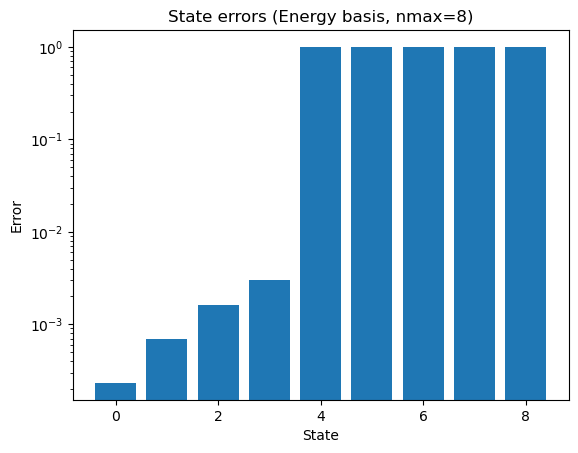

In [37]:
plt.bar(range(nmax+1),stateErrors)
plt.xlabel("State")
plt.ylabel("Error")
plt.yscale("log")
plt.title(f"State errors (Energy basis, nmax={nmax})")

## Position basis approximation
**Numerical solution to the 1-dimensional Time Independent Schrödinger Equation**

Based on the paper "Matrix Numerov method for solving Schrödinger's equation" by Mohandas Pillai, Joshua Goglio, and Thad G. Walker, _American Journal of Physics_ **80** (11), 1017 (2012).  [doi:10.1119/1.4748813](http://dx.doi.org/10.1119/1.4748813)


In [38]:
autoscale = False # set this equal to true to use Pillai's recommended step sizes

In [39]:
# values of constants
hbar = 1.0
mass = 1.0 # changing the mass will also change the energy scale
omega = 1.0

In [40]:
# bounds (These are overwritten if autoscale=True)
xmin = -5.0 # lower bound of position
xmax = 5.0 # upper bound of position
n = 100 # number of steps (may be overwritten if autoscale == True)
dx = (xmax-xmin)/(n-1)

In [41]:
# the function V is the potential energy function
def V(x):
    # make sure there is no division by zero
    # this also needs to be a "vectorizable" function
    # uncomment one of the examples below, or write your own.
    return 0.5*mass*omega**2*x*x # harmonic oscillator
    


In [42]:
if (autoscale): 
    #Emax is the maximum energy for which to check for eigenvalues
    Emax = 20.0
    #The next lines make some reasonable choices for the position grid size and spacing
    xt = opt.brentq(lambda x: V(x)-Emax ,0,5*Emax) #classical turning point
    dx = 1.0/np.sqrt(2*Emax) #step size
    # bounds and number of steps
    n = np.int(0.5+2*(xt/dx + 4.0*np.pi)) #number of steps
    xmin = -dx*(n+1)/2 
    xmax = dx*(n+1)/2

In [43]:
xmin, xmax, n #show the limits and number of steps

(-5.0, 5.0, 100)

In [44]:
#define the x coordinates
x = np.linspace(xmin,xmax,n)

In [45]:
#define the numerov matrices
B = np.matrix((np.eye(n,k=-1)+10.0*np.eye(n,k=0)+np.eye(n,k=1))/12.0)
A = np.matrix((np.eye(n,k=-1)-2.0*np.eye(n,k=0)+np.eye(n,k=1))/(dx**2))

In [46]:
#calculate kinetic energy operator using Numerov's approximation
KE = -0.5*hbar**2/mass*B.I*A

In [47]:
#calculate hamiltonian operator approximation
H = KE + np.diag(V(x))

In [48]:
#Calculate eigenvalues and eigenvectors of H
energies, wavefunctions = np.linalg.eigh(H) # "wavefunctions" is a matrix with one eigenvector in each column.

In [49]:
energies #display the lowest four energies

array([  0.5    ,   1.5    ,   2.49999,   3.49997,   4.49995,   5.49995,
         6.50014,   7.5013 ,   8.50608,   9.5215 ,  10.56142,  11.64605,
        12.79709,  14.0318 ,  15.36046,  16.78765,  18.31463,  19.94114,
        21.66645,  23.48968,  25.41002,  27.42671,  29.53908,  31.74649,
        34.04835,  36.44406,  38.93305,  41.5147 ,  44.1884 ,  46.95348,
        49.80923,  52.75488,  55.78962,  58.91257,  62.12274,  65.4191 ,
        68.80052,  72.26576,  75.81349,  79.44228,  83.15058,  86.93671,
        90.79886,  94.7351 ,  98.74336, 102.82141, 106.96687, 111.1772 ,
       115.4497 , 119.7815 , 124.16953, 128.61056, 133.10117, 137.63774,
       142.21645, 146.83329, 151.48404, 156.16427, 160.86935, 165.59444,
       170.33448, 175.08422, 179.83818, 184.59069, 189.33589, 194.06771,
       198.77989, 203.46601, 208.11944, 212.73343, 217.30105, 221.81525,
       226.26886, 230.65457, 234.96502, 239.19277, 243.33029, 247.37006,
       251.30452, 255.12611, 258.82731, 262.40061, 

In [50]:
energy_errors_positionbasis = (energies-exact_energy(np.array(range(n)),alpha))/exact_energy(np.array(range(n)),alpha)

In [51]:
n_target = 4 # particular state we're interested in

Text(0.5, 1.0, 'Energy relative errors (Energy basis, n=100, α=0.3)')

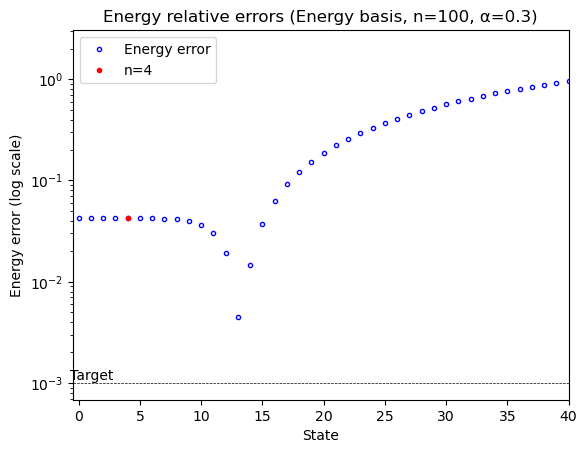

In [52]:
plot_max_n = 40 # limit the plot range to the lowest states
plt.plot(range(n),np.abs(energy_errors_positionbasis),'b.',mfc='none',label="Energy error")
plt.plot(n_target, np.abs(energy_errors_positionbasis[n_target]),'r.',label=f"n={n_target}")
plt.xlabel("State")
plt.ylabel("Energy error (log scale)")
plt.xlim(-0.5,plot_max_n)
plt.axhline(error_target,c='k',lw=0.5,ls="dashed")
plt.text(-0.7,error_target,"Target",fontsize="medium",verticalalignment="bottom")
plt.yscale("log")
plt.legend()
plt.title(f"Energy relative errors (Energy basis, n={n}, α={alpha})")

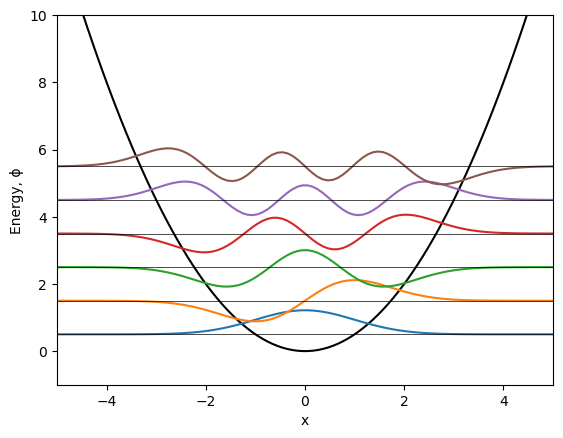

In [53]:
number = np.arange(6) #which wavefunctions to plot, starting counting from zero
zoom = 3.0 # zoom factor for plotting the wavefunctions to make them more visible
plt.plot(x,V(x),'-k',label="V(x)") # plot the potential
for num in number:
    plt.plot(x,zoom*wavefunctions[:,num]+energies[num],label=num) #plot the num-th wavefunction
    plt.hlines(energies[num],-5,5,color="black",linewidth=0.5)
plt.ylim(-1,10); # set limits of vertical axis for plot
plt.xlim(-5,5); # set limits of horizontal axis for plot
#plt.legend(loc="lower center");
plt.xlabel("x");
plt.ylabel("Energy, ϕ");

# Variational method
Code implementing the variational principle for a 1D potential.
To try different things, change:
- the potential function V
- the wavefunction psi
- the initial guess of the wavefunction parameters aguess

In [54]:
import numpy as np
from scipy.optimize import minimize
from scipy.integrate import quad
from numdifftools import Derivative

In [55]:
xmin = -10.0; xmax = 10.0 #limits of integration, may be np.inf (infinity), although you'll need to adjust the plots below
hbar = 1.0; mass = 1.0; omega=1.0 # some constants.  Changing mass will also change the energy scale.
alpha = 0.1

In [56]:
def V(x):
    # this example is the harmonic oscillator
    # make sure this function is "vectorizable" and does not have any division by zero
    return mass*(omega**2+alpha**2)*x**2/2

In [57]:
def psi(x,beta):
    '''Wavefunction as a function of position x.
    beta is the variational parameter'''
    # Note, normalization is not necessary
    # Tip: if your wavefunction is defined piecewise, see https://numpy.org/doc/stable/reference/generated/numpy.piecewise.html
    return np.exp(-beta*x**2)

In [58]:
betaguess = 0.5 # guess of the arguments that minimize the wavefunction

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
# for plotting only, 
xlist = np.linspace(xmin, xmax, 101)
ylist = [V(x) for x in xlist]
psilist = [psi(x,betaguess) for x in xlist]

In [61]:
def Hpsi(x,beta):
    '''The Hamiltonian acting on psi at point x'''
    d2psi = Derivative(lambda x: psi(x,beta), n=2)
    return -0.5*hbar**2/mass *d2psi(x) + V(x)*psi(x,beta)

In [62]:
def EVH(beta, psi):
    '''Expectation value of the Hamiltonian for wavefunction psi that has the argument beta
    psi is a function of x and beta
    beta is a parameter for the wavefunction'''
    # Calculate normalization of psi
    norm = quad(lambda x, a:np.abs(psi(x,beta))**2, xmin, xmax, args=(beta,))[0]
    ev = quad(lambda x, a:np.conj(psi(x,beta))*Hpsi(x,a), xmin, xmax, args=(beta,))[0]
    return ev/norm

In [63]:
output = minimize(EVH, betaguess, args=(psi,))
outlist = [psi(x,output.x) for x in xlist]

In [64]:
problist = [np.abs(psi(x,output.x))**2 for x in xlist]


In [65]:
print(f"Minimum energy = {output.fun:#.3g} for beta = {output.x[0]:#.3g}")

Minimum energy = 0.502 for beta = 0.502


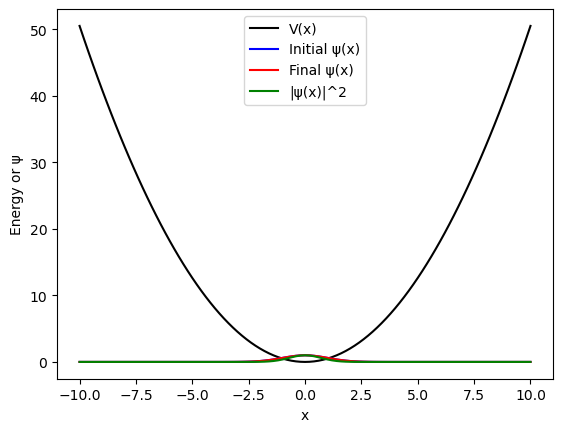

In [66]:
plt.plot(xlist,ylist,'k-', label = "V(x)")
plt.plot(xlist,psilist,'b-', label = "Initial ψ(x)")
plt.plot(xlist,outlist,'r-', label = "Final ψ(x)")
plt.plot(xlist,problist, 'g-', label = "|ψ(x)|^2")
plt.legend();
plt.xlabel("x");
plt.ylabel("Energy or ψ");